# Project NETFLIX

Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices.

This dataset, retrieved from kaggle, consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

Over the cause of analyzing the dataset, i will try to explore the following information:

* The countries with the highest amount of contents on netflix.
* The type of contents produced in different countries (U.S and India in focus) and also the rating of such contents.
* What periods of the year does netflix choose to add contents and why?
* How are Tv shows trending compared to Movies?
* An analysis on Nigerian contents on Netflix, with Nollywood being the 3rd Highest movies industry in the world.



Enrolling on this course and learning Numpy and Pandas library has shown me how to analyze large data with less time and more efficiency. Being a newbie to the programming world, the tutorial was very comprehensive and the course was quite understandable. And to think it was free, its really commendable.

I am looking forward to more courses like this that will help me sharpen my Data analysis skills unto more advanced roles in data science and machine learning.


In [1]:
project_name = "project-NETFLIX"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

## Data Preparation and Cleaning

TODO

In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
netflix_raw= pd.read_csv('netflix_titles.csv')

In [7]:
netflix_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [8]:
netflix_raw['date_added']

0       September 9, 2019
1       September 9, 2016
2       September 8, 2018
3       September 8, 2018
4       September 8, 2017
              ...        
6229                  NaN
6230                  NaN
6231                  NaN
6232                  NaN
6233                  NaN
Name: date_added, Length: 6234, dtype: object


lets convert the 'date_added' column which is initially an object type to a datetime type

In [9]:
netflix_raw['date_added']= pd.to_datetime(netflix_raw.date_added)

In [10]:
netflix_raw['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6229          NaT
6230          NaT
6231          NaT
6232          NaT
6233          NaT
Name: date_added, Length: 6234, dtype: datetime64[ns]

In [11]:
netflix_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [12]:
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


## 
Now we try to create a new dataframe copy of the raw data. we will be working and making changes on the new copy and
and we will name it netflix_df.

In [13]:
netflix_df= netflix_raw
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [14]:
netflix_df['country'].head(20)

0              United States, India, South Korea, China
1                                        United Kingdom
2                                         United States
3                                         United States
4                                         United States
5                                                 Spain
6                Bulgaria, United States, Spain, Canada
7                                                 Chile
8                                         United States
9        United States, United Kingdom, Denmark, Sweden
10                                                  NaN
11    Netherlands, Belgium, United Kingdom, United S...
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              


From the above cell, we can see that multiple entries were made at some instances under the 'country' column. but we are only interested in working on values per country. so the code below will help us obtain those values under 'country' column that have one country featured only.

In [15]:
netflix_df.where(~(netflix_df.country.str.contains(',', na= False)),np.nan, inplace=True)

we will as well drop all the rows containing NaN on the 'country' column.

In [16]:
netflix_df.dropna(subset=['country'], inplace= True)

In [17]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401.0,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016.0,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439.0,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013.0,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654.0,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016.0,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979.0,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017.0,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890.0,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6227,80005756.0,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015.0,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6229,80000063.0,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015.0,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564.0,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016.0,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022.0,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013.0,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [18]:
netflix_df['country'].head(10)

1     United Kingdom
2      United States
3      United States
4      United States
5              Spain
7              Chile
8      United States
20     United States
23     United States
24     United States
Name: country, dtype: object



            we will now take out some columns that will not be useful for our analysis

In [19]:
netflix_df.drop(['show_id','cast','duration','description'],axis= 1, inplace= True)

Finally, let us add 3 new columns, 'Movies', 'Shows' to identify a title type and  'year_added'.

In [20]:
netflix_df['Movies']= netflix_df.type== 'Movie'
netflix_df['Shows']= netflix_df.type== 'TV Show'
netflix_df['year_added']= pd.DatetimeIndex(netflix_df.date_added).year

In [21]:
netflix_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016-09-09,2016.0,TV-MA,Stand-Up Comedy,True,False,2016.0
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0
5,TV Show,Apaches,NaN,Spain,2017-09-08,2016.0,TV-MA,"Crime TV Shows, International TV Shows, Spanis...",False,True,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,Australia,NaT,2015.0,TV-Y7,"Kids' TV, TV Comedies",False,True,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaT,2013.0,TV-MA,"British TV Shows, TV Comedies, TV Dramas",False,True,NaN


In [22]:
jovian.commit(project=project_name,filename='zerotopandas-course-project.ipynb',output=['netflix_titles.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sulenas/project-netflix" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sulenas/project-netflix


'https://jovian.ml/sulenas/project-netflix'

## Exploratory Analysis and Visualization

TODO

In [23]:
sns.set_style('darkgrid')

Let us start by identifying the 10 countries with the most movies/tv shows.

In [24]:
top_countries= netflix_df.country.value_counts().head(10)
top_countries

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

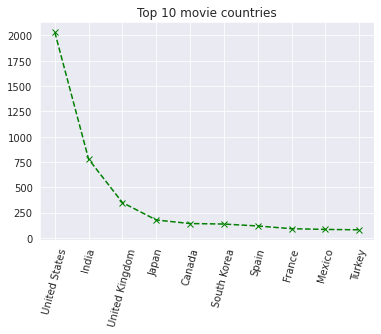

In [25]:
plt.title('Top 10 movie countries')
plt.xticks(rotation=75)
plt.plot(top_countries.index,top_countries,'x--g');


From the line plot above, it is quite obvious that the U.S,by far, has the most contents of movies/TV shows on netflix, followed by India's Bollywood.

In [26]:
netflix_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016-09-09,2016.0,TV-MA,Stand-Up Comedy,True,False,2016.0
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0
5,TV Show,Apaches,NaN,Spain,2017-09-08,2016.0,TV-MA,"Crime TV Shows, International TV Shows, Spanis...",False,True,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,Australia,NaT,2015.0,TV-Y7,"Kids' TV, TV Comedies",False,True,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaT,2013.0,TV-MA,"British TV Shows, TV Comedies, TV Dramas",False,True,NaN




Now let's see the months with the highest movie release. But to do this, we must first create a new column called 'month_released'.

In [27]:
netflix_df['month_added']= pd.DatetimeIndex(netflix_df.date_added).month
netflix_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016-09-09,2016.0,TV-MA,Stand-Up Comedy,True,False,2016.0,9.0
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0,9.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0,9.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0,9.0
5,TV Show,Apaches,NaN,Spain,2017-09-08,2016.0,TV-MA,"Crime TV Shows, International TV Shows, Spanis...",False,True,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,Australia,NaT,2015.0,TV-Y7,"Kids' TV, TV Comedies",False,True,NaN,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaT,2013.0,TV-MA,"British TV Shows, TV Comedies, TV Dramas",False,True,NaN,NaN


In [28]:
movie_periods= netflix_df.groupby('month_added')[['title']].count()
movie_times= movie_periods.rename(columns={'title':'contents'})
movie_times

,contents
month_added,
1.0,437
2.0,309
3.0,460
4.0,351
5.0,327
6.0,306
7.0,375
8.0,409
9.0,354


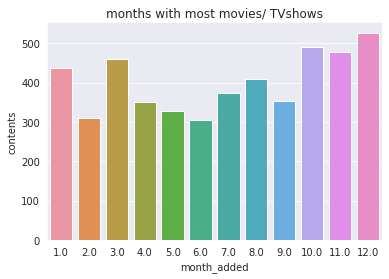

In [29]:
plt.title('months with most movies/ TVshows')
sns.barplot(movie_times.index, movie_times.contents);

Seems like netflix focus mostly on year ends to release their shows/ movies.



lets see the categories netflix movies/ shows are listed_in.

In [30]:
netflix_df.listed_in.value_counts()

Documentaries                                       250
Stand-Up Comedy                                     247
Dramas, International Movies                        190
Comedies, Dramas, International Movies              151
Dramas, Independent Movies, International Movies    128
                                                   ... 
Children & Family Movies, Faith & Spirituality        1
Action & Adventure, Cult Movies                       1
Anime Features, Romantic Movies                       1
Comedies, Music & Musicals, Romantic Movies           1
Children & Family Movies, Comedies, LGBTQ Movies      1
Name: listed_in, Length: 425, dtype: int64



seems like most shows on netflix are dcumentaries, closely followed by stand-up comedies. Although we can see that some movies are listed on multiple categories.

Let's try checking for single entry 'listed_in' categories.

In [31]:
single_listed= netflix_df.where(~(netflix_df.listed_in.str.contains(',', na= False)),np.nan, inplace=False)
single_listed.listed_in.value_counts()

Documentaries                   250
Stand-Up Comedy                 247
Kids' TV                         87
Children & Family Movies         77
Dramas                           69
Comedies                         63
Docuseries                       55
TV Comedies                      48
Action & Adventure               46
Reality TV                       41
Thrillers                        34
Horror Movies                    32
Movies                           30
TV Dramas                        22
TV Shows                          6
Stand-Up Comedy & Talk Shows      6
Music & Musicals                  4
Anime Series                      3
Romantic Movies                   2
Anime Features                    2
International TV Shows            1
Sci-Fi & Fantasy                  1
International Movies              1
Sports Movies                     1
Independent Movies                1
TV Action & Adventure             1
Name: listed_in, dtype: int64

Now we can confirm that indeed documentary shows are more than other listed movies/TVshows on Netflix. 



Now lets show the various netflix content types and represent it using a piechart.

In [32]:
netflix_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [33]:
type_count= netflix_df.type.value_counts()
type_count

Movie      3332
TV Show    1503
Name: type, dtype: int64

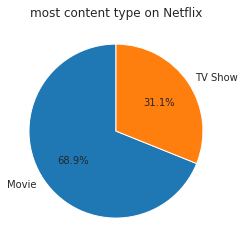

In [34]:
plt.title('most content type on Netflix')
plt.pie(type_count, labels= type_count.index,autopct='%1.1f%%',startangle=90);

So from the piechart, it becomes quite clear that there are more movie contents than there are TV shows.

In [35]:
jovian.commit(project=project_name,filename='zerotopandas-course-project.ipynb',output=['netflix_titles.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sulenas/project-netflix" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sulenas/project-netflix


'https://jovian.ml/sulenas/project-netflix'

## Asking and Answering Questions

TODO

## Q1: Top 10 years with the most contents added on Netflix

In [36]:
netflix_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016-09-09,2016.0,TV-MA,Stand-Up Comedy,True,False,2016.0,9.0
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0,9.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0,9.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0,9.0
5,TV Show,Apaches,NaN,Spain,2017-09-08,2016.0,TV-MA,"Crime TV Shows, International TV Shows, Spanis...",False,True,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,Australia,NaT,2015.0,TV-Y7,"Kids' TV, TV Comedies",False,True,NaN,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaT,2013.0,TV-MA,"British TV Shows, TV Comedies, TV Dramas",False,True,NaN,NaN






first we group the contents by the year added on netflix and count the number of contents per year.

In [37]:
movies_yearly= netflix_df.groupby('year_added')[['title']].count()
movies_yearly

,title
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,12
2012.0,5
2013.0,10
2014.0,17
2015.0,71
2016.0,367


Next we sort the groupby dataframe by titles. We will also rename the 'title' column to a name more descriptive of the values in the column.

In [38]:
most_movie_year= movies_yearly.sort_values('title',ascending= False).head(10)
most_movie_year.rename(columns={'title':'total_contents'}, inplace= True)

In [39]:
most_movie_year

,total_contents
year_added,
2019.0,1808
2018.0,1387
2017.0,1026
2016.0,367
2020.0,118
2015.0,71
2014.0,17
2011.0,12
2013.0,10


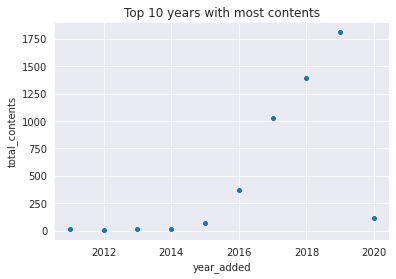

In [40]:
plt.title('Top 10 years with most contents')
sns.scatterplot(most_movie_year.index, most_movie_year.total_contents );

so it seems Netflix had more contents in year 2019 than any other year showing a steady rise in content from 2014.

## Q2: What Type of contents are produced more in the United States?

let us take out all contents from the US.

In [41]:
US_charts= netflix_df[netflix_df.country== 'United States']
US_charts

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0,9.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0,9.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0,9.0
8,TV Show,Fire Chasers,NaN,United States,2017-09-08,2017.0,TV-MA,"Docuseries, Science & Nature TV",False,True,2017.0,9.0
20,Movie,Manhattan Romance,Tom O'Brien,United States,2017-09-08,2014.0,TV-14,"Comedies, Independent Movies, Romantic Movies",True,False,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6225,TV Show,Frasier,NaN,United States,NaT,2003.0,TV-PG,"Classic & Cult TV, TV Comedies",False,True,NaN,NaN
6226,TV Show,La Familia P. Luche,NaN,United States,NaT,2012.0,TV-14,"International TV Shows, Spanish-Language TV Sh...",False,True,NaN,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN,NaN


In [42]:
US_charts.groupby('type')[['title']].count()

,title
type,
Movie,1482
TV Show,550


So, obviously the U.S has more movie contents on netflix than there are TV shows.

## Q3: How Are Movies/Shows Rated In India?

First we need a dataframe of all info about Indian movies/shows on netflix.

In [43]:
indian_df= netflix_df[netflix_df.country=='India']
indian_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
35,Movie,Article 15,Anubhav Sinha,India,2019-09-06,2019.0,TV-MA,"Dramas, International Movies, Thrillers",True,False,2019.0,9.0
37,Movie,Ee Nagaraniki Emaindi,Tharun Bhascker,India,2019-09-06,2018.0,TV-14,"Comedies, International Movies",True,False,2019.0,9.0
41,Movie,PK,Rajkumar Hirani,India,2018-09-06,2014.0,TV-14,"Comedies, Dramas, International Movies",True,False,2018.0,9.0
58,Movie,Watchman,A. L. Vijay,India,2019-09-04,2019.0,TV-14,"Comedies, Dramas, International Movies",True,False,2019.0,9.0
99,TV Show,Bard of Blood,NaN,India,2019-09-27,2019.0,TV-MA,"International TV Shows, TV Action & Adventure,...",False,True,2019.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,Movie,The Human Factor: The Untold Story of the Bomb...,Rudradeep Bhattacharjee,India,2017-04-01,2013.0,TV-PG,"Documentaries, International Movies, Music & M...",True,False,2017.0,4.0
5708,TV Show,Little Things,NaN,India,2019-11-09,2019.0,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",False,True,2019.0,11.0
5839,TV Show,The House That Made Me,NaN,India,2017-03-31,2015.0,TV-PG,"International TV Shows, Reality TV",False,True,2017.0,3.0
5867,TV Show,Sab Jholmaal Hai,Vijay Roche,India,2019-03-01,2017.0,TV-G,"Kids' TV, TV Comedies",False,True,2019.0,3.0


We will now group the column 'rating' and count the number of movies/shows on each rating

In [44]:
indian_rating= indian_df.groupby('rating')[['title']].count()
indian_rating.rename(columns={'title':'total_contents'}, inplace= True)
indian_rating

,total_contents
rating,
NR,19
PG,3
PG-13,4
R,2
TV-14,421
TV-G,7
TV-MA,182
TV-PG,130
TV-Y,1


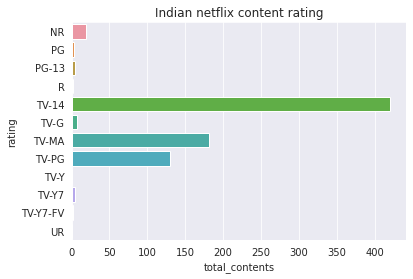

In [45]:
plt.title('Indian netflix content rating')
sns.barplot(indian_rating.total_contents,indian_rating.index);

From the distribution above, we can say that most indian netflix contents are unsuitable for persons under the age of 14.

## Q4: What is the relation between Movies and Shows over the last 10 years?

With this question, we want to see the growth rate of TV shows as compared to Movies over the past 15 years on netflix.

In [46]:
netflix_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016-09-09,2016.0,TV-MA,Stand-Up Comedy,True,False,2016.0,9.0
2,TV Show,Transformers Prime,NaN,United States,2018-09-08,2013.0,TV-Y7-FV,Kids' TV,False,True,2018.0,9.0
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2018-09-08,2016.0,TV-Y7,Kids' TV,False,True,2018.0,9.0
4,Movie,#realityhigh,Fernando Lebrija,United States,2017-09-08,2017.0,TV-14,Comedies,True,False,2017.0,9.0
5,TV Show,Apaches,NaN,Spain,2017-09-08,2016.0,TV-MA,"Crime TV Shows, International TV Shows, Spanis...",False,True,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,Australia,NaT,2015.0,TV-Y7,"Kids' TV, TV Comedies",False,True,NaN,NaN
6229,TV Show,Red vs. Blue,NaN,United States,NaT,2015.0,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",False,True,NaN,NaN
6230,TV Show,Maron,NaN,United States,NaT,2016.0,TV-MA,TV Comedies,False,True,NaN,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaT,2013.0,TV-MA,"British TV Shows, TV Comedies, TV Dramas",False,True,NaN,NaN


In [47]:
net_trend= netflix_df.groupby('year_added')[['title','Movies','Shows']].sum().tail(10)
net_trend

,Movies,Shows
year_added,,
2011.0,12,0
2012.0,3,2
2013.0,6,4
2014.0,14,3
2015.0,46,25
2016.0,209,158
2017.0,723,303
2018.0,1027,360
2019.0,1195,613


In [48]:
net_trend['total_Movies']= net_trend.Movies.cumsum()
net_trend['total_Shows']= net_trend.Shows.cumsum()

In [49]:
net_trend

,Movies,Shows,total_Movies,total_Shows
year_added,,,,
2011.0,12,0,12,0
2012.0,3,2,15,2
2013.0,6,4,21,6
2014.0,14,3,35,9
2015.0,46,25,81,34
2016.0,209,158,290,192
2017.0,723,303,1013,495
2018.0,1027,360,2040,855
2019.0,1195,613,3235,1468


lets represent this on a line plot

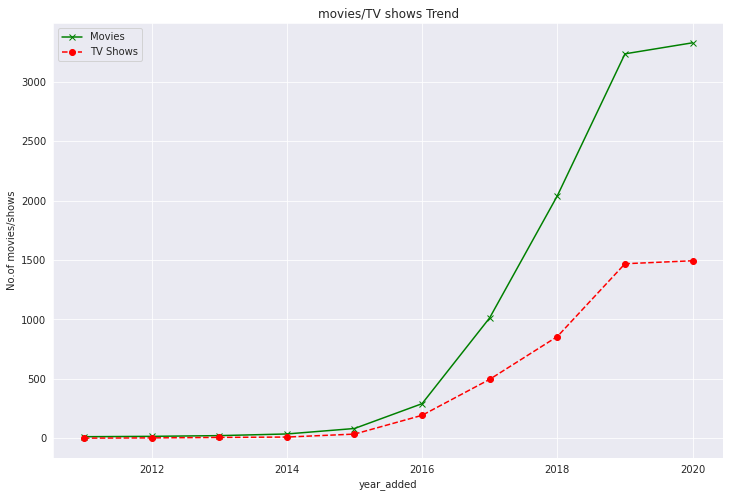

In [50]:
plt.figure(figsize=(12,8));
plt.title('movies/TV shows Trend');
plt.plot(net_trend.index,net_trend.total_Movies, 'g-x');
plt.plot(net_trend.index, net_trend.total_Shows, 'r--o');
plt.legend(['Movies','TV Shows']);
plt.xlabel('year_added'); plt.ylabel('No.of movies/shows');

The plot above shows a steady rise of TV shows on netflix over the past 10 years, especially from 2016.

## Q5: Analysing Nigerian contents on netflix

In [51]:
nigeria_df= netflix_df[netflix_df.country== 'Nigeria']
nigeria_df

,type,title,director,country,date_added,release_year,rating,listed_in,Movies,Shows,year_added,month_added
142,Movie,King of Boys,Kemi Adetiba,Nigeria,2019-09-21,2018.0,TV-MA,"Dramas, International Movies",True,False,2019.0,9.0
143,Movie,Merry Men: The Real Yoruba Demons,Toka McBaror,Nigeria,2019-09-21,2018.0,TV-MA,"Comedies, International Movies",True,False,2019.0,9.0
145,Movie,The Wedding Party 2: Destination Dubai,Niyi Akinmolayan,Nigeria,2019-09-21,2017.0,TV-14,"Comedies, International Movies, Romantic Movies",True,False,2019.0,9.0
308,Movie,Mokalik (Mechanic),Kunle Afolayan,Nigeria,2019-09-01,2019.0,TV-14,"Dramas, International Movies",True,False,2019.0,9.0
312,Movie,Oct-01,Kunle Afolayan,Nigeria,2019-09-01,2014.0,TV-MA,"Dramas, International Movies, Thrillers",True,False,2019.0,9.0
315,Movie,Phone Swap,Kunle Afolayan,Nigeria,2019-09-01,2012.0,TV-14,"Comedies, International Movies, Romantic Movies",True,False,2019.0,9.0
322,Movie,The Bridge,Kunle Afolayan,Nigeria,2019-09-01,2017.0,TV-14,"Dramas, International Movies, Romantic Movies",True,False,2019.0,9.0
323,Movie,The CEO,Kunle Afolayan,Nigeria,2019-09-01,2016.0,TV-14,"Dramas, International Movies, Thrillers",True,False,2019.0,9.0
623,Movie,Moms at War,Omoni Oboli,Nigeria,2019-10-19,2018.0,TV-14,"Comedies, Dramas, International Movies",True,False,2019.0,10.0
642,Movie,93 Days,Steve Gukas,Nigeria,2019-10-18,2016.0,TV-14,"Dramas, International Movies, Thrillers",True,False,2019.0,10.0


In [52]:
nigeria_df.groupby('year_added')[['type','Movies','Shows']].sum()

,Movies,Shows
year_added,,
2015.0,1,0
2016.0,1,0
2017.0,1,0
2018.0,2,0
2019.0,31,0


A Nigerian content featured on netflix for the first time in the year 2015. 
So far, there are no Nigerian TV Shows on netfix.

In [53]:
top_director= nigeria_df.groupby('director')[['title']].count()
top_director.sort_values('title',ascending= False).head(5)

,title
director,
Kunle Afolayan,6
Omoni Oboli,4
Niyi Akinmolayan,3
Tope Oshin,2
Kemi Adetiba,2


Kunle Afolayan is the Nigerian director with the most contents on netflix.

In [54]:
Nigeria_ratings= nigeria_df.groupby('rating')[['title']].count()

In [55]:
Nigeria_ratings.rename(columns={'title':'total_content'},inplace= True)

In [56]:
Nigeria_ratings

,total_content
rating,
NR,2
TV-14,21
TV-MA,12
TV-PG,1


Of the 36 Nigerian contents on netflix, 21 are not suitable for audience under the age of 14.

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sulenas/project-netflix" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sulenas/project-netflix


'https://jovian.ml/sulenas/project-netflix'

## Inferences and Conclusion

TODO

From the analysis done on this project, the following deductions were attained:

* Most contents on netflix are U.S contents distantly followed by Indian contents.
* Most netflix contents are added in the final quarter of the year, perhaps targeting the holiday period where families come to   spend time together.
* There are obviously more Movies on netflix than Tv shows.
* TV shows on netflix are increasing almost at the same rate as movies are being added.
* Analysis done on Indian and Nigerian contents show that most contents from these two countries are not suitable for persons     under the age of 14.
* There are more documentary_listed contents on netflix than any other type of content.


Analyzing the netflix data has given an insite as to the type of contents available in various countries and its suitability to the audience. Perhaps in a digital world such as we have and with the fact that almost everyone, irrespective of age, can now have access to the internet and also all sorts of contents without restriction, there should be a need to put more restrictions on those shows/ movies that are rated for adult viewing only in order to protect the younger population.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

TODO

I found these sites useful over the course of my project work:

* https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv

* https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python#:~:text=Use%20df.,contain%20NaN%20under%20those%20columns.

* https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python#:~:text=Use%20df.,contain%20NaN%20under%20those%20columns.

* https://www.datacamp.com/community/tutorials/python-rename-column?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1010294&gclid=EAIaIQobChMIn9fnjsCO7AIV0entCh2jSwHKEAAYASAAEgKQ_fD_BwE

* https://en.wikipedia.org/wiki/TV_Parental_Guidelines

* https://www.netflix.com/ng/
* https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study
* https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas

I am planning on taking on more projects soon, mainly those related to finance.

In [ ]:
jovian.commit(project=project_name,filename='zerotopandas-course-project.ipynb',output=['netflix_titles.csv'])